### MNIST Data Classification Model

The aim of this project is to build a hand written digit classification model using a Neural Network, with a single hidden layer with 25 units. Furthermore shall use reagularisation to avoid overfitting. 

In this project I've written most of the Neural Network functionality by myself even though there are packages made for this. As an individual who is relatively new to ML at the time of writing this Notebook, I felt it would be best to show understanding of the underlying math. 

The training data is a subset of the MNIST dataset, in particular I use 5000 training data pieces. Each piece of data is gathered by taking a 20x20 pixel picture of a hand written digit. 

Imports Required:

In [1]:
import scipy.io
import numpy as np
import math
from Functions_For_Model.rand_initial_weights import rand_initial_weights
from Functions_For_Model.predict import predict
from Functions_For_Model.feed_forward import feed_forward
from Functions_For_Model.pixel_pic import pixel_picture
import scipy.optimize as op
from PIL import Image 
import matplotlib.pyplot as plt


Load the data in, the data is provided in the form of Matlab matrix. X will denote our design matrix, and y is our labels vector, telling us which number each data entry corresponds to.

We note that the data is provided such that the label '10' corresponds to the data entry being the number 0. 

In [2]:
data = scipy.io.loadmat('./Data/ex4data1')
X = data['X']
y = data['y']

Establish Some Model Parameters: 

- m = Number of data entries, in this case, m=5000. 
- n = Number of features. 
- k = Number of classes, in this case, we have 10, for numbers 0-9. 
- lambd = Regularisation constant. 
- pixel_dim = Number of pixels we use to obtain feature from picture of digit, in this case, =20. 
- input_layer = Input layer size. 
- hidden_layer = Number of units in the hidden layer. 
- output_layer = Number of classes. 
- epsilon = Initial values for gradient descent obtained through uniformly sampling from the interval (-epsilon, epsilon). Need to randomly sample to GS breaking through symmetry. 

In [3]:
m = X.shape[0]
n = X.shape[1] + 1 
k = 10 #(number of classes)
lambd = 1
pixel_dim = 20
input_layer = 400
hidden_layer = 25
output_layer = 10
epsilon = 0.1

Load some test parameters for the Neural Network. These have been generated on a previous run of this notebook. I load these in for one particular reason. If I want to run the Digit Classification notebook to predict only, it saves me from having to run Gradient Descent every time. 

In [4]:
test_param = scipy.io.loadmat('./Data/ex4weights')
test_theta1 = test_param['Theta1']
test_theta2 = test_param['Theta2']

params = np.hstack((test_theta1.reshape(1,hidden_layer*(input_layer+1)), test_theta2.reshape(1,output_layer*(hidden_layer+1))))
params = params.flatten()

Need to add a column of 1's to the design matrix and construct the labels matrix denoted by Y.

In [5]:
X = np.insert(X,0, 1,axis = 1)

Y = np.zeros((m, k))

for j in range(1,10):
    idx = np.where(y == j)
    Y[idx[0], j-1] = 1

idx_0 = np.where(y==10)
Y[idx_0[0],9] = 1 

Define a cost function specific to our data, and theta is the parameter for our model. Theta needs to be given as a flattened numpy array. Theta corresponds to the 2 matrices required to feed forward through our Neural Network. 

In [6]:
cost = lambda p: cost_func(X,Y,p,lambd, input_layer, hidden_layer, output_layer)[0]

grad = lambda p: cost_func(X,Y,p,lambd, input_layer, hidden_layer, output_layer)[1]

Initialise some random weights/parameters for our model. These are uniformly generated from an interval (-epsilon, epsilon). 

In [7]:
initial_Theta1_vec = rand_initial_weights(epsilon,input_layer,hidden_layer)
initial_Theta2_vec = rand_initial_weights(epsilon, hidden_layer,output_layer)
initial_param = np.hstack((initial_Theta1_vec, initial_Theta2_vec))
initial_param = initial_param.flatten()

Here we run the gradient descent algorithm using the optimise library from Scipy. Set the iterations to 50 and initialise the algorithm with our weights generated above. 

The "optimize" value is set to 0 by default, if we set to 1, then we run the gradient descent algorithm otherwise we will use some parameters generated previously that have been stored.

In [8]:
optimize = 0
if optimize:    
    params = op.fmin_cg(cost, initial_param, fprime=grad,maxiter = 50)

As we've now run gradient descent for 50 iterations to minimise the cost function, let's generate our model predictions and see the accuracy on our training data. 

In [9]:

model_predictions = predict(X, params, input_layer, hidden_layer, output_layer).reshape((m,1)) 

model_accuracy = (y==model_predictions).sum()/m * 100
print("The model Accuracy is:"+" "+str(model_accuracy)+"%")

The model Accuracy is: 97.52%


The following is an extension of me trying to draw digits on a tool on: https://kleki.com. The objective of this was to see if my model could predict correctly my own hand writing. 

The steps I took to generate the features from a png of my hand drawn number. 

- Convert image to grayscale. 
- Convert image to a 20x20 pixel picture with gray scale values. 
- Compute the bitwise inverse. 
- Scale grayscale values to be between 0 and 1 and reshape into a feature vector, like the features from the MNIST dataset.
- Insert a value 1 in the first column as our model requires. 

These steps above are taken in the function pixel_picture. This returns a pixel picture and a feature vector for this digit.

In [10]:
pixel_image, features = pixel_picture('./Test_Examples/test_9_2.png', pixel_dim)

Let's view the picture so we can see what the picture looks like after the preprocessing. 

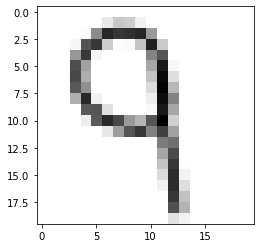

In [11]:
fig1 = plt.figure(1) 
plt.imshow(pixel_image.T/255, cmap='gray_r')

Let's Feed this feature vector into our model and see what the prediction is, the true number is given by the file name. 

In [12]:
print(predict(features, params, input_layer, hidden_layer, output_layer))

[9]


Although this looks good based on the pixel picture above, let's try another example: 

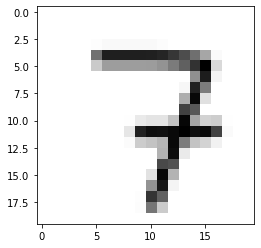

In [13]:
pixel_image_2, features_2 = pixel_picture('./Test_Examples/test_7_2.png', pixel_dim)
fig2 = plt.figure(2) 
plt.imshow(pixel_image_2.T/255, cmap='gray_r')

In [14]:
print(predict(features_2, params, input_layer, hidden_layer, output_layer))

[3]


We can see that this picture is obviously a number 7, however the model predicts it's a number 3. This makes some intuitive sense as this type of number 7 resembles some characteristics of the number 3. This also shows us that this model needs some work. 

After some research, I realised that generation of MNIST Data has used a fair amount of further preprocessing than as I have done. This is something I aim to work on in the future. 

For now the project is complete. 